Download the dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\dg038\.cache\kagglehub\datasets\lainguyn123\student-performance-factors\versions\9


import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
custom_colors = [
    '#1f77b4', '#ff7f0e', "#3FA23F", '#d62728',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#5254a3', '#9c9ede', '#6b6ecf', '#b5cf6b', '#cedb9c',
    '#e7ba52', '#bd9e39', '#ad494a', '#a55194', '#de9ed6',
    '#3182bd', '#31a354', '#756bb1', '#ff9896', '#c5b0d5'
]

In [3]:
data=pd.read_csv(r"C:\Users\dg038\.cache\kagglehub\datasets\lainguyn123\student-performance-factors\versions\9\StudentPerformanceFactors.csv")
data


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
data.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [6]:
data.iloc[1690:1710]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1690,24,84,Medium,Medium,Yes,7,61,Medium,Yes,2,Medium,Medium,Public,Positive,2,No,High School,Far,Male,68
1691,17,82,High,High,No,5,61,Medium,Yes,3,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,69
1692,25,86,Medium,Medium,Yes,9,97,Low,Yes,1,High,Medium,Private,Neutral,3,No,High School,Moderate,Male,70
1693,12,80,High,Medium,No,5,72,Medium,Yes,1,High,Medium,Private,Positive,4,Yes,High School,Near,Female,65
1694,21,61,Medium,Medium,No,4,90,Low,Yes,2,Medium,Low,Public,Neutral,3,No,High School,Near,Male,63
1695,32,84,Low,Medium,Yes,8,64,Medium,Yes,1,Low,High,Private,Positive,3,No,College,Near,Female,71
1696,14,89,Medium,High,Yes,6,94,Low,Yes,0,Low,Medium,Private,Neutral,2,No,Postgraduate,Near,Male,68
1697,16,77,Medium,Medium,Yes,7,92,High,Yes,5,Low,High,Public,Positive,3,No,Postgraduate,Near,Female,70
1698,23,90,Medium,High,Yes,8,76,High,Yes,2,Medium,Low,Public,Positive,3,No,High School,Near,Female,72
1699,21,69,Medium,Medium,Yes,6,85,Medium,Yes,3,Low,Low,Public,Neutral,1,No,College,Far,Female,64


In [7]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

Clean the data[remove the non values , remove the outlayers]

In [11]:
data['Teacher_Quality'].mode()  

0    Medium
Name: Teacher_Quality, dtype: object

In [12]:
data['Parental_Education_Level'].mode()

0    High School
Name: Parental_Education_Level, dtype: object

In [13]:
data['Distance_from_Home'].mode()

0    Near
Name: Distance_from_Home, dtype: object

In [14]:
data.Teacher_Quality.fillna(data.Teacher_Quality.mode()[0], inplace=True)
data.Parental_Education_Level.fillna(data.Parental_Education_Level.mode()[0], inplace=True)
data.Distance_from_Home.fillna(data.Distance_from_Home.mode()[0], inplace=True)

C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\3997853536.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Teacher_Quality.fillna(data.Teacher_Quality.mode()[0], inplace=True)
C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\3997853536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [16]:
numeric_features = data.select_dtypes(include=[np.number])
for col in numeric_features.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    data = data.drop(outliers.index)

In [17]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [18]:
data.shape

(6054, 20)

Analyze & Vesualize data

In [19]:
data['Hours_Studied'].describe()

count    6054.000000
mean       20.019326
std         5.776193
min         4.000000
25%        16.000000
50%        20.000000
75%        24.000000
max        36.000000
Name: Hours_Studied, dtype: float64

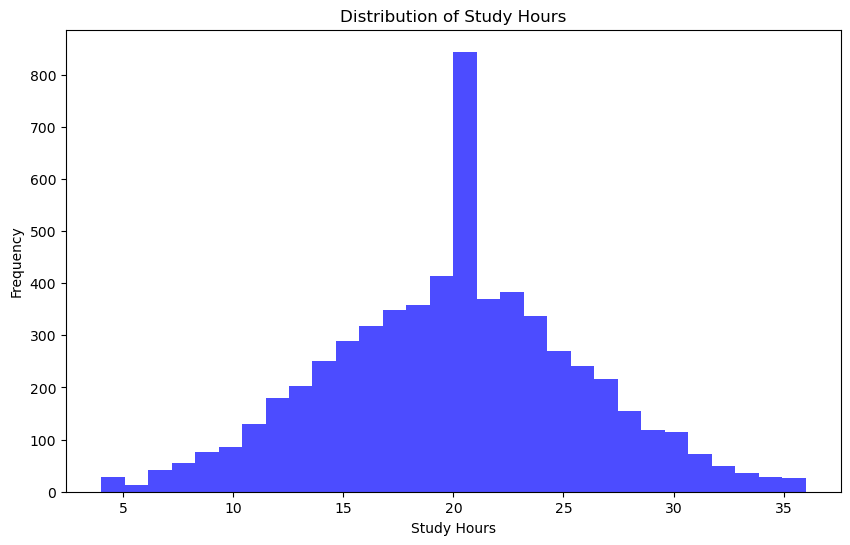

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data['Hours_Studied'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show()

In [21]:
data['Attendance'].describe()

count    6054.000000
mean       79.972580
std        11.498579
min        60.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: Attendance, dtype: float64

In [22]:
data['Parental_Involvement'].value_counts()

Parental_Involvement
Medium    3098
High      1745
Low       1211
Name: count, dtype: int64

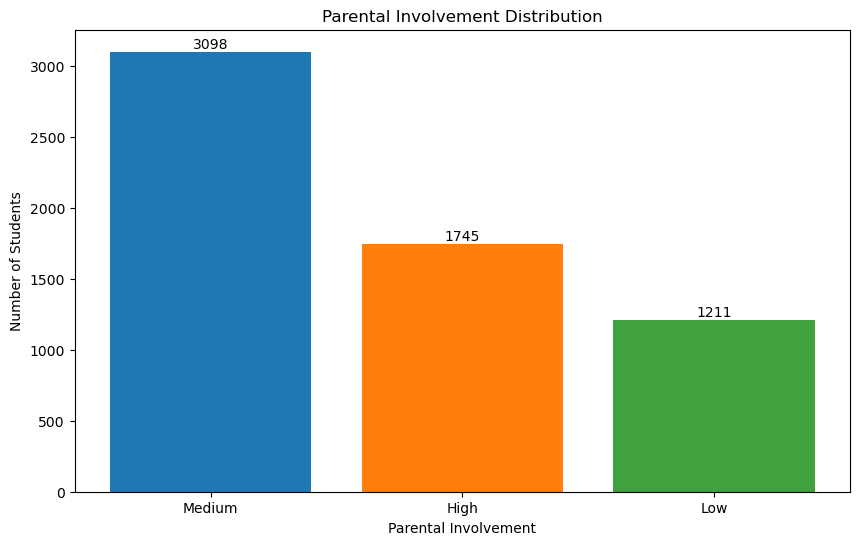

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(data['Parental_Involvement'].value_counts().index, data['Parental_Involvement'].value_counts().values, color=custom_colors)
plt.title('Parental Involvement Distribution')
for i in range(len(data['Parental_Involvement'].value_counts().values)):
    plt.text(i, data['Parental_Involvement'].value_counts().values[i], data['Parental_Involvement'].value_counts().values[i], ha='center', va='bottom')
    
plt.xlabel('Parental Involvement')
plt.ylabel('Number of Students')
plt.show()

In [24]:
data['Access_to_Resources'].value_counts()

Access_to_Resources
Medium    3048
High      1805
Low       1201
Name: count, dtype: int64

In [25]:
data['Extracurricular_Activities']  .value_counts()

Extracurricular_Activities
Yes    3605
No     2449
Name: count, dtype: int64

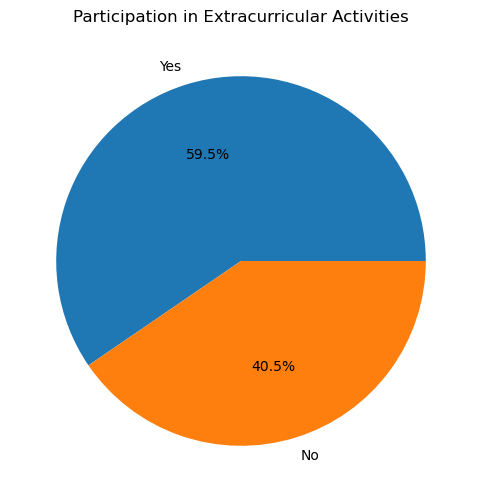

In [26]:
plt.figure(figsize=(10, 6))
plt.pie(data['Extracurricular_Activities'].value_counts().values, labels=data['Extracurricular_Activities'].value_counts().index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Participation in Extracurricular Activities')
plt.show()

In [27]:
data['Sleep_Hours'].describe()

count    6054.000000
mean        7.034357
std         1.469827
min         4.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: Sleep_Hours, dtype: float64

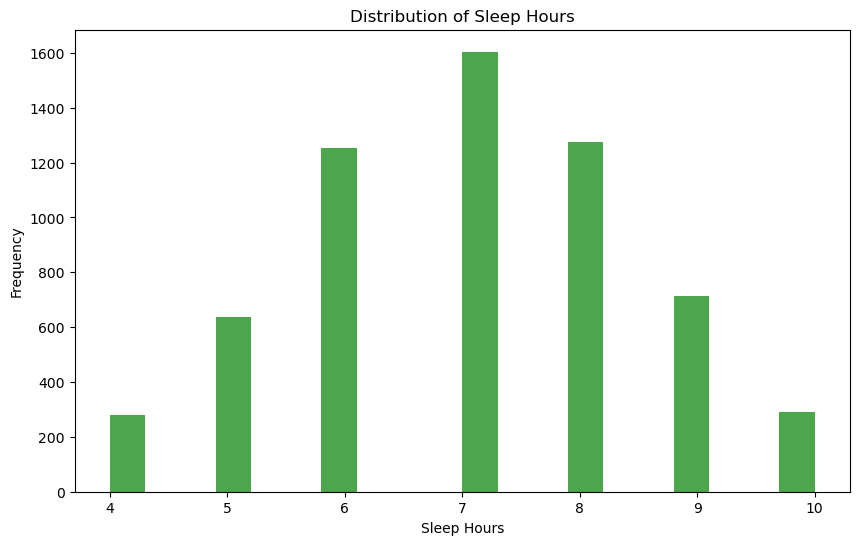

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(data['Sleep_Hours'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()


In [29]:
data['Previous_Scores'].describe()  

count    6054.000000
mean       75.111827
std        14.355942
min        50.000000
25%        63.000000
50%        75.000000
75%        87.750000
max       100.000000
Name: Previous_Scores, dtype: float64

In [30]:
data['Motivation_Level'].value_counts()


Motivation_Level
Medium    3077
Low       1775
High      1202
Name: count, dtype: int64

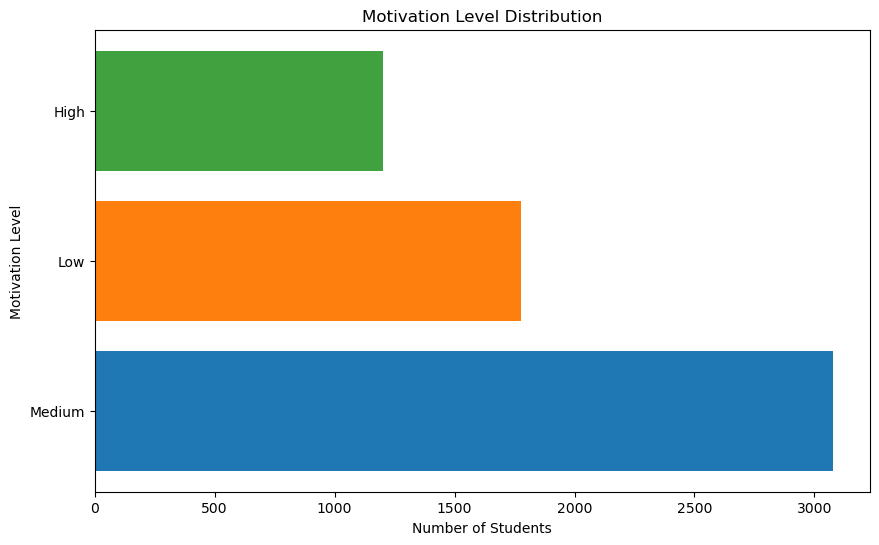

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(data['Motivation_Level'].value_counts().index, data['Motivation_Level'].value_counts().values, color=custom_colors)
plt.title('Motivation Level Distribution')
plt.xlabel('Number of Students')
plt.ylabel('Motivation Level')
plt.show()

In [32]:
data['Internet_Access'].value_counts()

Internet_Access
Yes    5592
No      462
Name: count, dtype: int64

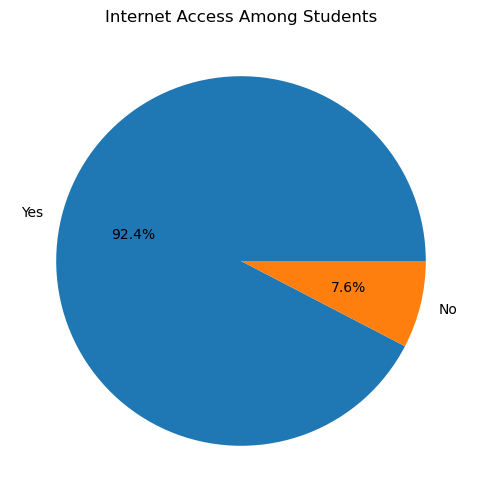

In [33]:

plt.figure(figsize=(10, 6))
plt.pie(data['Internet_Access'].value_counts().values, labels=data['Internet_Access'].value_counts().index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Internet Access Among Students')
plt.show()


In [34]:
data['Tutoring_Sessions'].describe()


count    6054.000000
mean        1.293360
std         0.983676
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Tutoring_Sessions, dtype: float64

In [35]:
data['Family_Income'].value_counts()

Family_Income
Medium    2458
Low       2441
High      1155
Name: count, dtype: int64

In [36]:
data['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3668
High      1790
Low        596
Name: count, dtype: int64

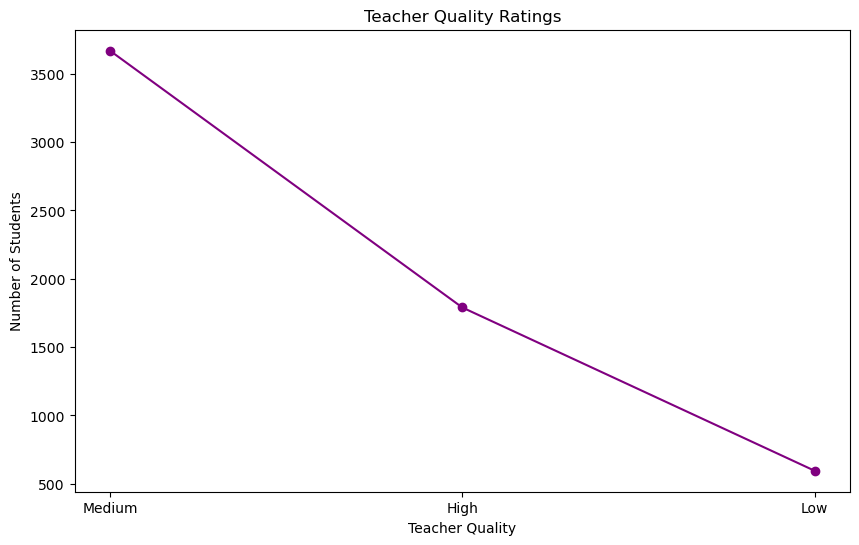

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(data['Teacher_Quality'].value_counts().index, data['Teacher_Quality'].value_counts().values, marker='o', color='purple')
plt.title('Teacher Quality Ratings')
plt.xlabel('Teacher Quality')
plt.ylabel('Number of Students')
plt.show()

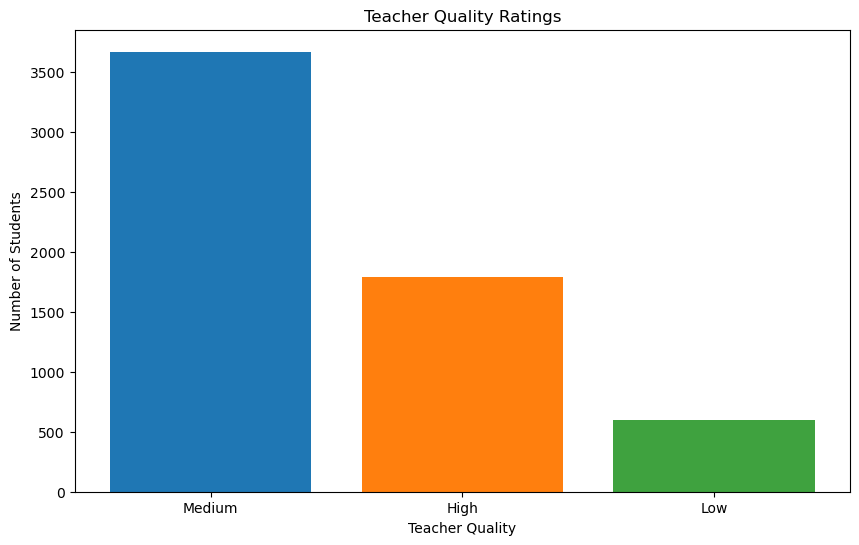

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(data['Teacher_Quality'].value_counts().index, data['Teacher_Quality'].value_counts().values, color=custom_colors)
plt.title('Teacher Quality Ratings')
plt.xlabel('Teacher Quality')
plt.ylabel('Number of Students')
plt.show()

In [39]:
data['School_Type'].value_counts()

School_Type
Public     4215
Private    1839
Name: count, dtype: int64

In [40]:
data['Peer_Influence'].value_counts()

Peer_Influence
Positive    2415
Neutral     2379
Negative    1260
Name: count, dtype: int64

In [41]:
data['Physical_Activity'].describe()

count    6054.000000
mean        2.961843
std         1.029563
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Physical_Activity, dtype: float64

In [42]:
data['Learning_Disabilities'].value_counts()

Learning_Disabilities
No     5432
Yes     622
Name: count, dtype: int64

In [43]:
data['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3040
College         1813
Postgraduate    1201
Name: count, dtype: int64

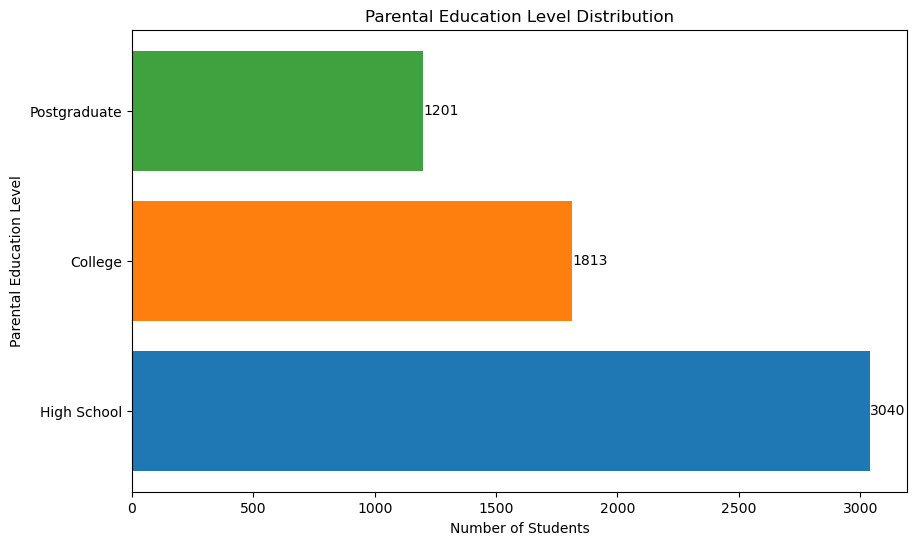

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(data['Parental_Education_Level'].value_counts().index, data['Parental_Education_Level'].value_counts().values, color=custom_colors)
for i in range(len(data['Parental_Education_Level'].value_counts().values)):
    plt.text(data['Parental_Education_Level'].value_counts().values[i], i, data['Parental_Education_Level'].value_counts().values[i], ha='left', va='center')
plt.title('Parental Education Level Distribution')
plt.xlabel('Number of Students')
plt.ylabel('Parental Education Level')
plt.show()

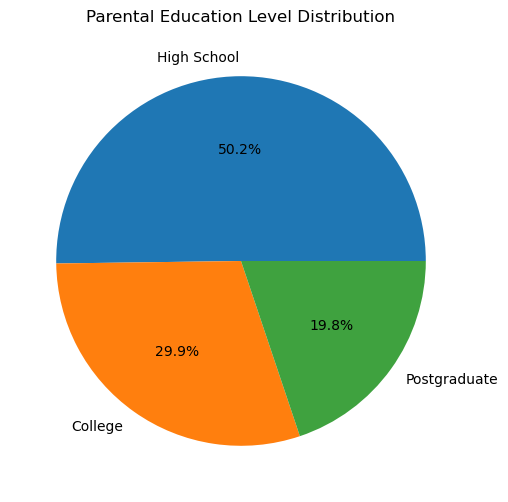

In [45]:
plt.figure(figsize=(10, 6))
plt.pie(data['Parental_Education_Level'].value_counts().values, labels=data['Parental_Education_Level'].value_counts().index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Parental Education Level Distribution')
plt.show()

In [46]:
data['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3621
Moderate    1835
Far          598
Name: count, dtype: int64

In [47]:
data['Gender'].value_counts()

Gender
Male      3491
Female    2563
Name: count, dtype: int64

In [48]:
data['Exam_Score'].describe()

count    6054.000000
mean       66.981500
std         3.225434
min        59.000000
25%        65.000000
50%        67.000000
75%        69.000000
max        75.000000
Name: Exam_Score, dtype: float64

In [49]:
group=data.groupby('Gender').Exam_Score.mean()
group

Gender
Female    66.930940
Male      67.018619
Name: Exam_Score, dtype: float64

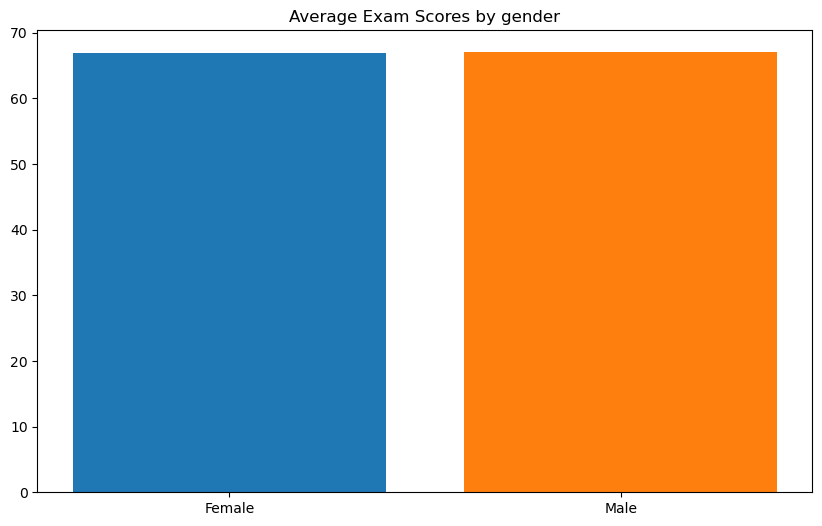

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(group.index, group.values, color=custom_colors)
plt.title('Average Exam Scores by gender')
plt.show()

In [51]:
data.groupby('Parental_Education_Level').Exam_Score.mean()

Parental_Education_Level
College         67.052399
High School     66.640461
Postgraduate    67.737719
Name: Exam_Score, dtype: float64

In [52]:
data.groupby('School_Type').Exam_Score.mean()

School_Type
Private    67.041871
Public     66.955160
Name: Exam_Score, dtype: float64

In [53]:
data.groupby('Distance_from_Home').Exam_Score.mean()

Distance_from_Home
Far         66.229097
Moderate    66.767847
Near        67.214029
Name: Exam_Score, dtype: float64

In [54]:
data.groupby('Distance_from_Home').Previous_Scores.mean()

Distance_from_Home
Far         75.285953
Moderate    74.957493
Near        75.161281
Name: Previous_Scores, dtype: float64

In [55]:
data.groupby('Motivation_Level').Exam_Score.mean()

Motivation_Level
High      67.400998
Low       66.556056
Medium    67.063048
Name: Exam_Score, dtype: float64

In [56]:
data.groupby('Parental_Involvement').Exam_Score.mean()

Parental_Involvement
High      67.736963
Low       66.069364
Medium    66.912524
Name: Exam_Score, dtype: float64

In [57]:
pd.crosstab(data['Parental_Involvement'],data['Motivation_Level'])

Motivation_Level,High,Low,Medium
Parental_Involvement,,,
High,329,530,886
Low,247,331,633
Medium,626,914,1558


In [58]:
pd.crosstab(data['Parental_Involvement'], data['Learning_Disabilities'])

Learning_Disabilities,No,Yes
Parental_Involvement,,
High,1556,189
Low,1082,129
Medium,2794,304


In [59]:
pd.crosstab(data['Parental_Education_Level'],data['Parental_Involvement'])

Parental_Involvement,High,Low,Medium
Parental_Education_Level,,,
College,536,371,906
High School,872,594,1574
Postgraduate,337,246,618


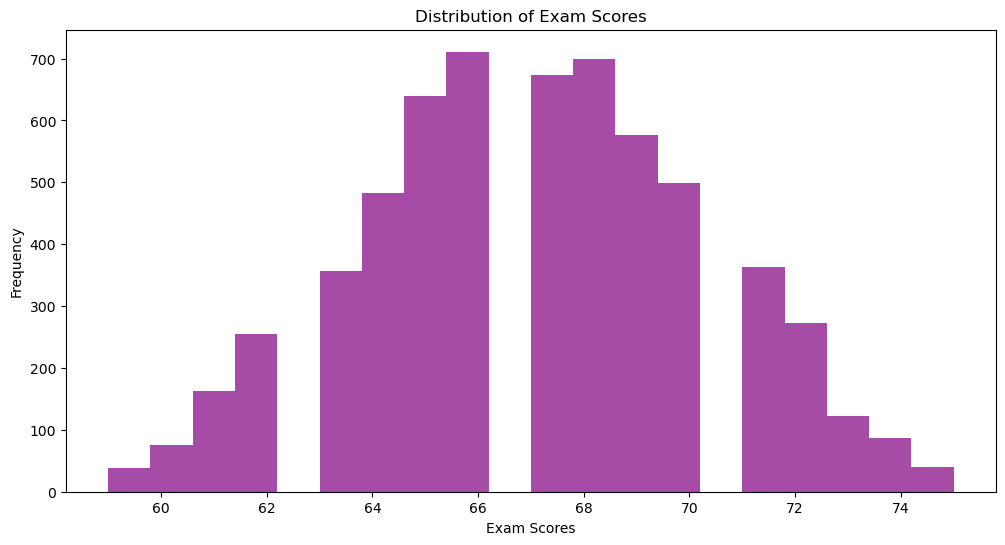

In [60]:
plt.figure(figsize=(12, 6))
plt.hist(data['Exam_Score'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')
plt.show()

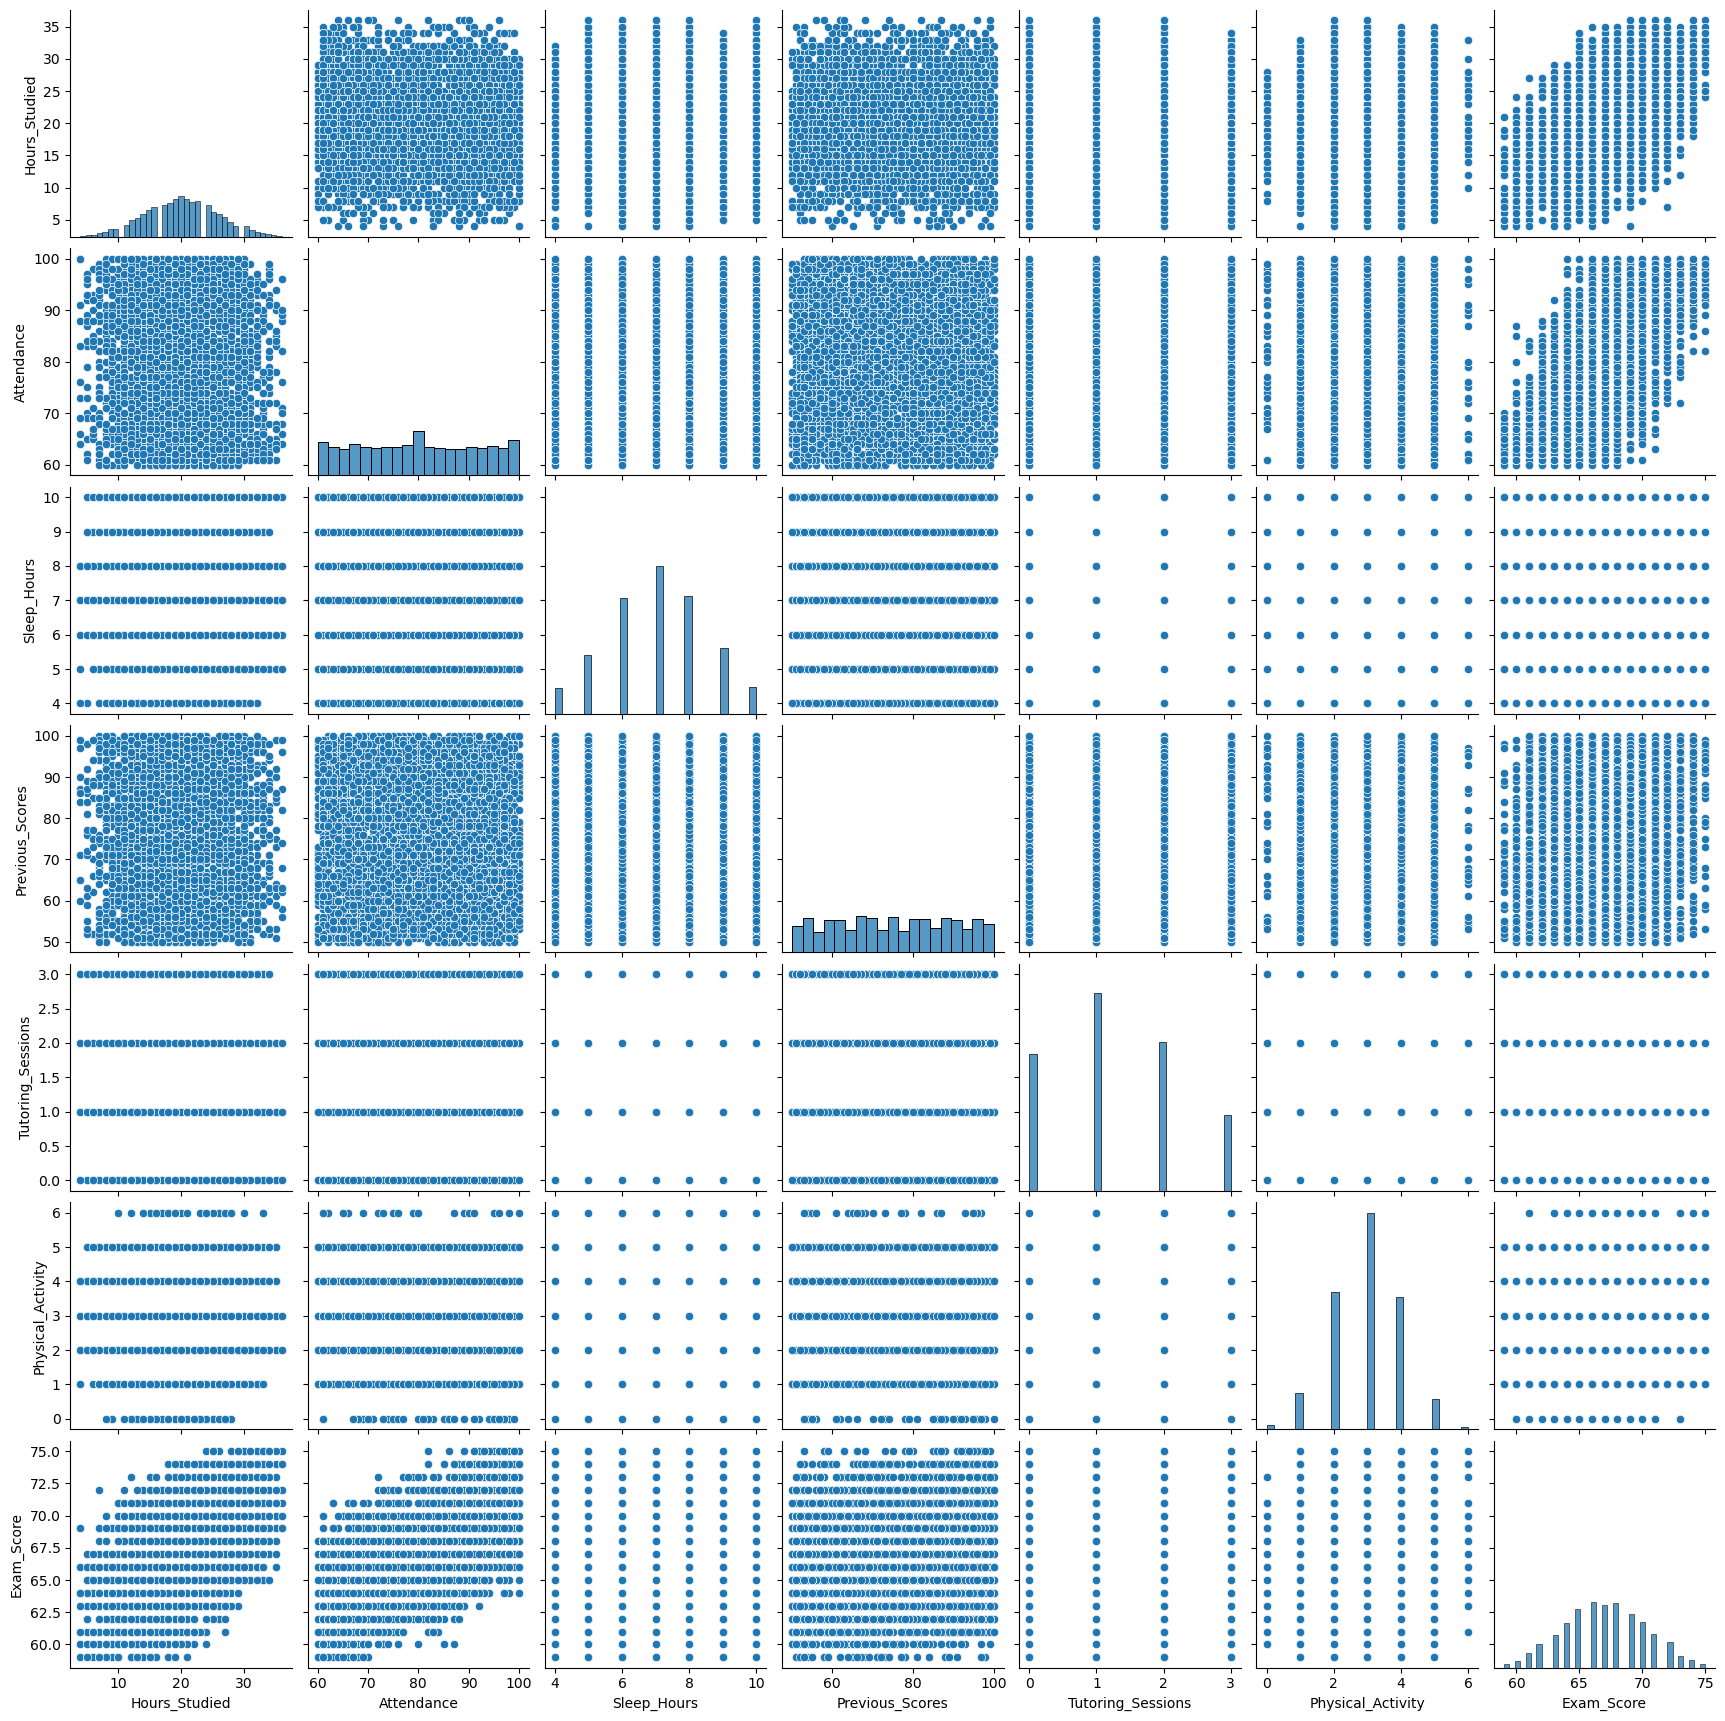

In [61]:
sns.pairplot(data)

C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\2596158399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Parental_Education_Level', y='Exam_Score', data=data, palette=custom_colors)
C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\2596158399.py:2: UserWarning: The palette list has more values (29) than needed (3), which may not be intended.
  sns.boxenplot(x='Parental_Education_Level', y='Exam_Score', data=data, palette=custom_colors)


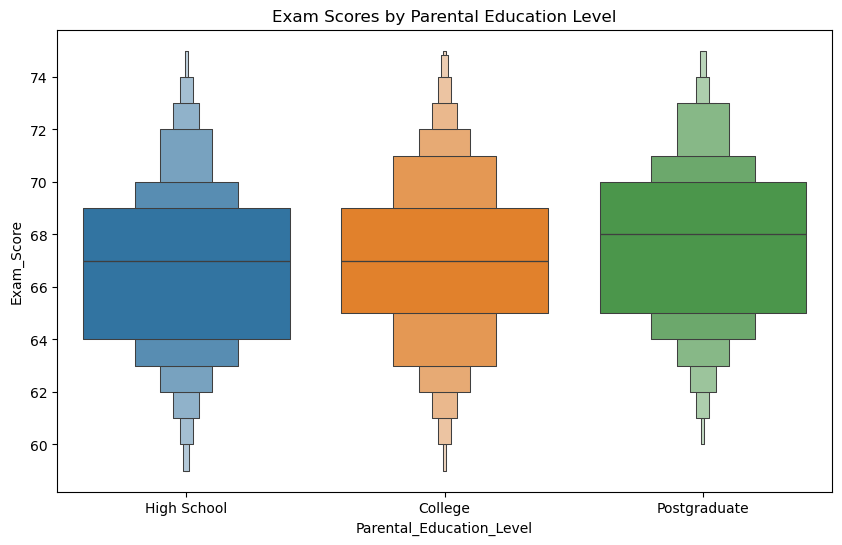

In [62]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Parental_Education_Level', y='Exam_Score', data=data, palette=custom_colors)
plt.title('Exam Scores by Parental Education Level')
plt.show()

C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\3306079199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Exam_Score',y='Distance_from_Home',data=data,palette=custom_colors)
C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\3306079199.py:2: UserWarning: The palette list has more values (29) than needed (3), which may not be intended.
  sns.boxenplot(x='Exam_Score',y='Distance_from_Home',data=data,palette=custom_colors)


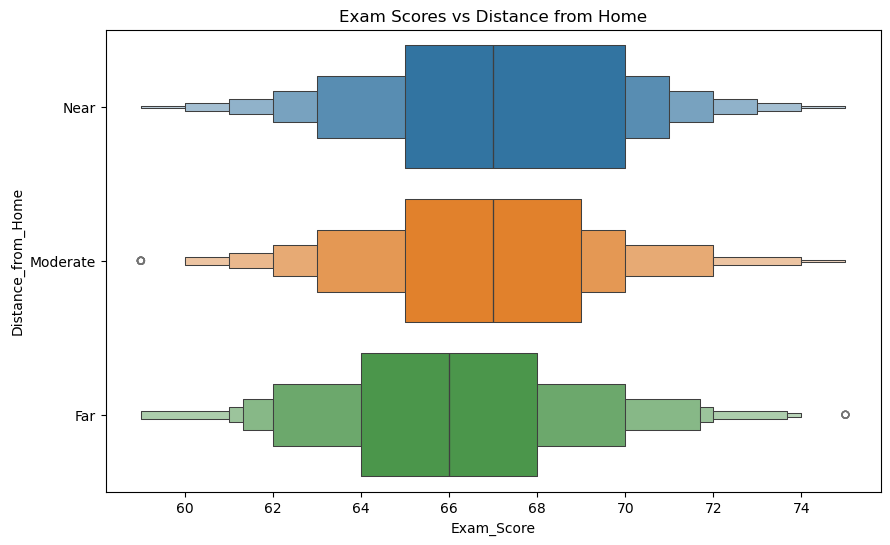

In [63]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Exam_Score',y='Distance_from_Home',data=data,palette=custom_colors)
plt.title('Exam Scores vs Distance from Home')
plt.show()

C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\3929344973.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Exam_Score', y='Motivation_Level', data=data, palette=custom_colors)
C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\3929344973.py:1: UserWarning: The palette list has more values (29) than needed (3), which may not be intended.
  sns.boxenplot(x='Exam_Score', y='Motivation_Level', data=data, palette=custom_colors)


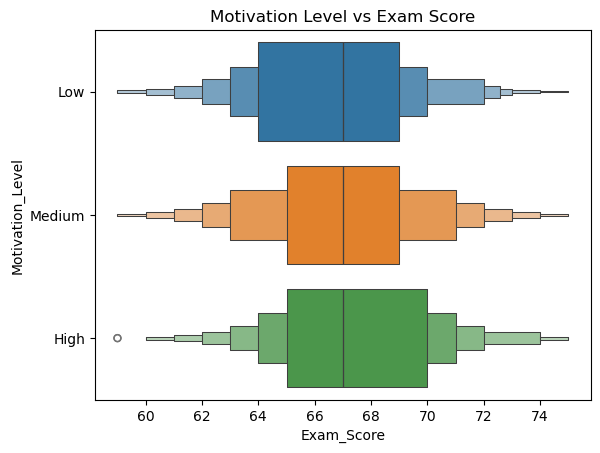

In [64]:
sns.boxenplot(x='Exam_Score', y='Motivation_Level', data=data, palette=custom_colors)
plt.title('Motivation Level vs Exam Score')
plt.show()

C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\1306509627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exam_Score', y='Learning_Disabilities', data=data, palette=custom_colors)
C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\1306509627.py:2: UserWarning: The palette list has more values (29) than needed (2), which may not be intended.
  sns.violinplot(x='Exam_Score', y='Learning_Disabilities', data=data, palette=custom_colors)


<Axes: xlabel='Exam_Score', ylabel='Learning_Disabilities'>

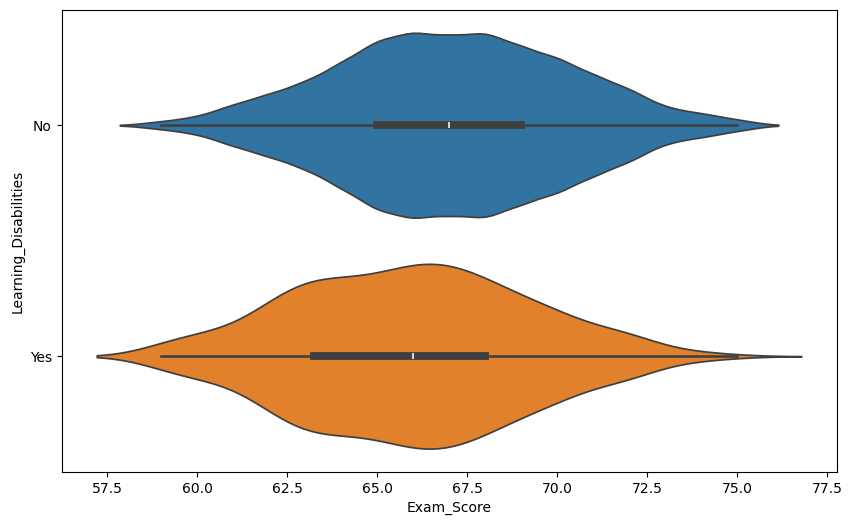

In [65]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Exam_Score', y='Learning_Disabilities', data=data, palette=custom_colors)

C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\3929344973.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Exam_Score', y='Motivation_Level', data=data, palette=custom_colors)
C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\3929344973.py:1: UserWarning: The palette list has more values (29) than needed (3), which may not be intended.
  sns.boxenplot(x='Exam_Score', y='Motivation_Level', data=data, palette=custom_colors)


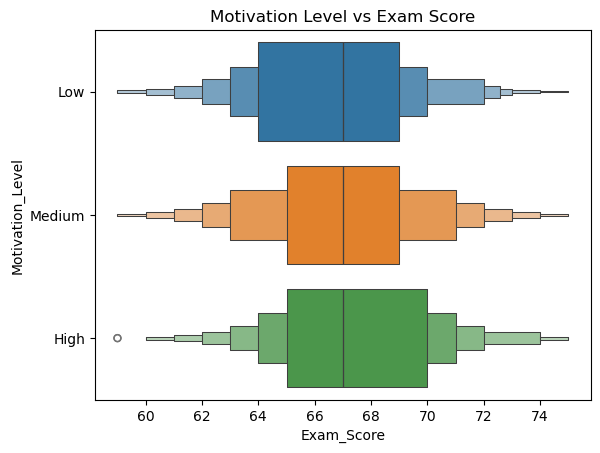

In [66]:
sns.boxenplot(x='Exam_Score', y='Motivation_Level', data=data, palette=custom_colors)
plt.title('Motivation Level vs Exam Score')
plt.show()

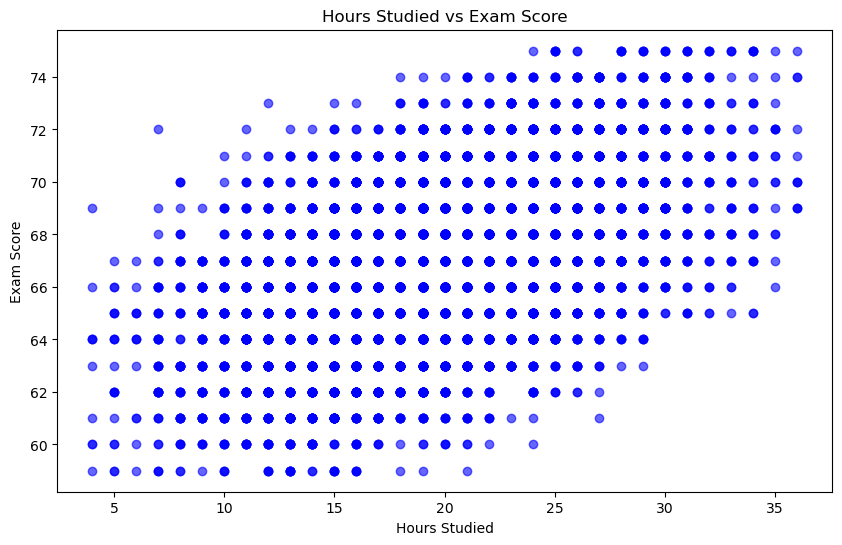

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Hours_Studied'], data['Exam_Score'], color='blue', alpha=0.6)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\2162037200.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=data, palette=custom_colors)


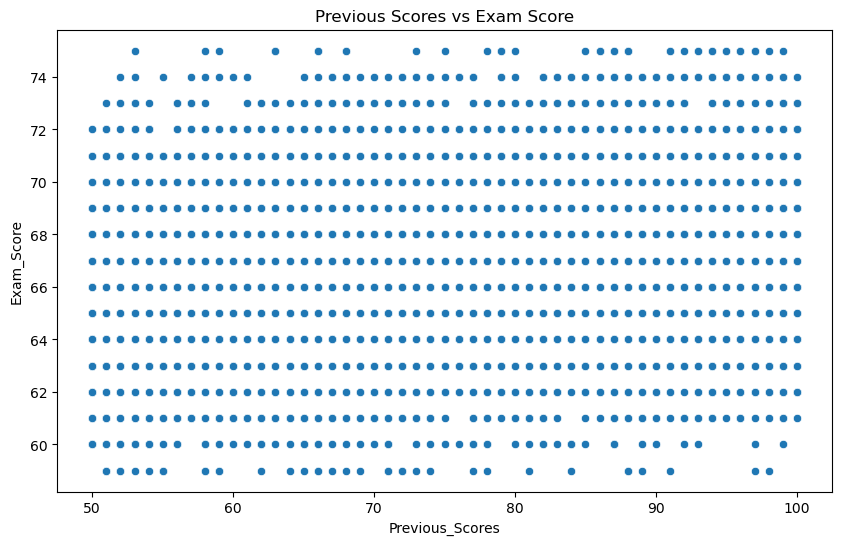

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=data, palette=custom_colors)
plt.title('Previous Scores vs Exam Score')
plt.show()

C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\1209633497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Exam_Score', y='Peer_Influence', data=data, palette=custom_colors)
C:\Users\dg038\AppData\Local\Temp\ipykernel_14148\1209633497.py:2: UserWarning: The palette list has more values (29) than needed (3), which may not be intended.
  sns.boxenplot(x='Exam_Score', y='Peer_Influence', data=data, palette=custom_colors)


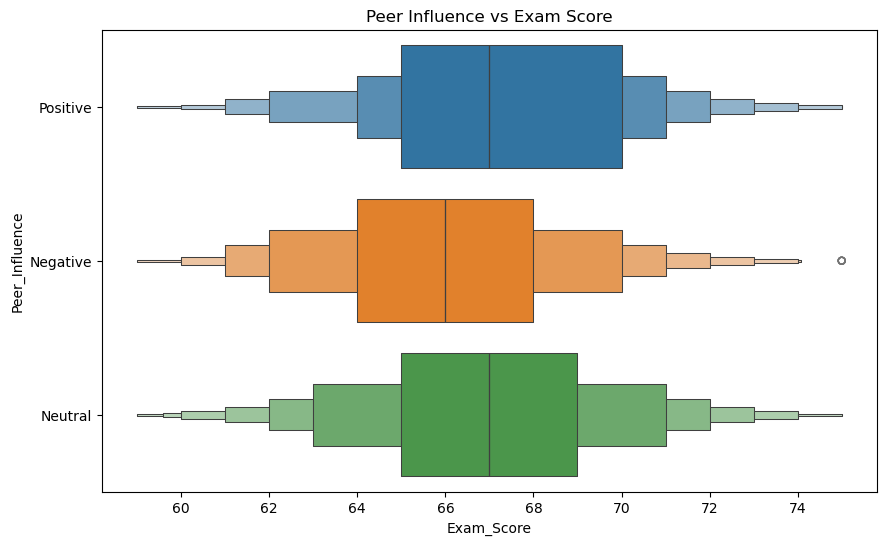

In [69]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Exam_Score', y='Peer_Influence', data=data, palette=custom_colors)
plt.title('Peer Influence vs Exam Score')
plt.show()

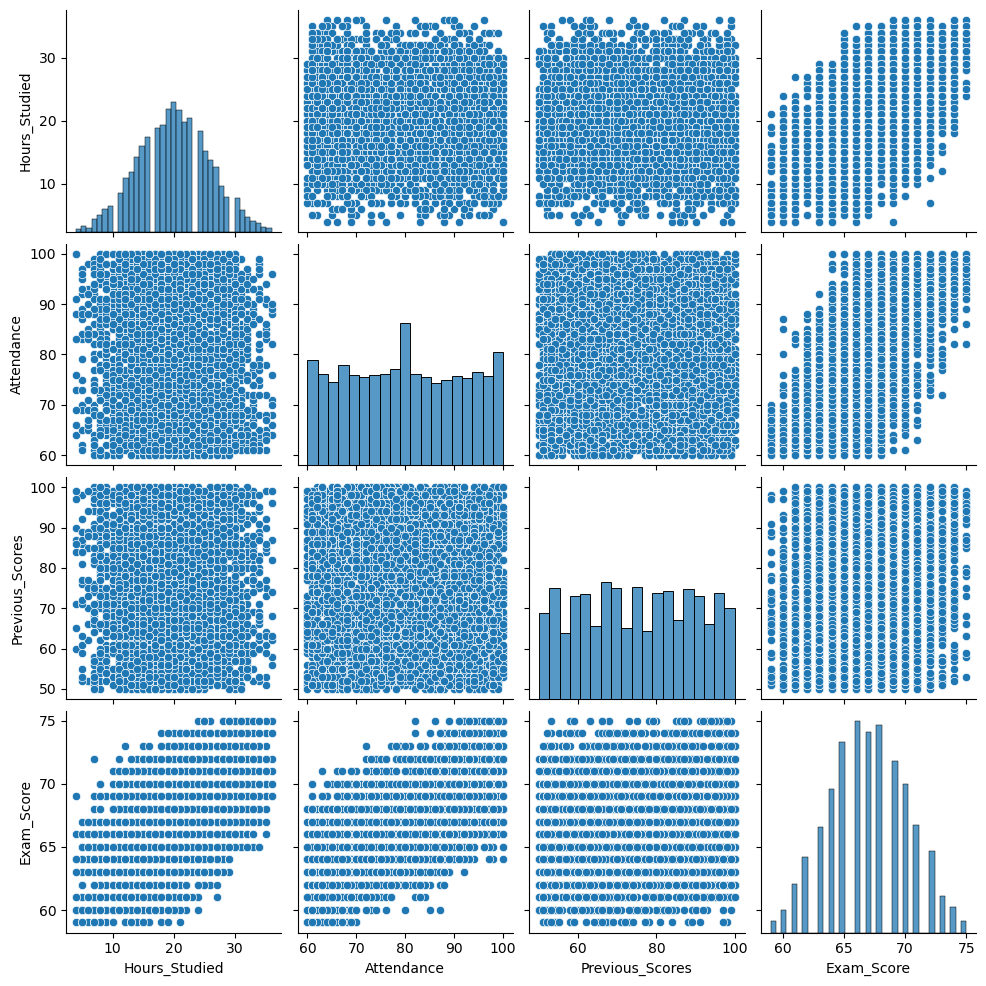

In [70]:
sns.pairplot(data[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']])

In [71]:
data.corr(numeric_only=True)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.030671,0.011480,0.014321,-0.012105,-0.003571,0.500809
Attendance,-0.030671,1.000000,-0.018986,-0.027151,0.005984,-0.031655,0.682257
Sleep_Hours,0.011480,-0.018986,1.000000,-0.018354,-0.005258,0.003159,-0.009101
Previous_Scores,0.014321,-0.027151,-0.018354,1.000000,-0.024540,-0.011839,0.198775
Tutoring_Sessions,-0.012105,0.005984,-0.005258,-0.024540,1.000000,-0.015372,0.140999
Physical_Activity,-0.003571,-0.031655,0.003159,-0.011839,-0.015372,1.000000,0.030135
Exam_Score,0.500809,0.682257,-0.009101,0.198775,0.140999,0.030135,1.000000


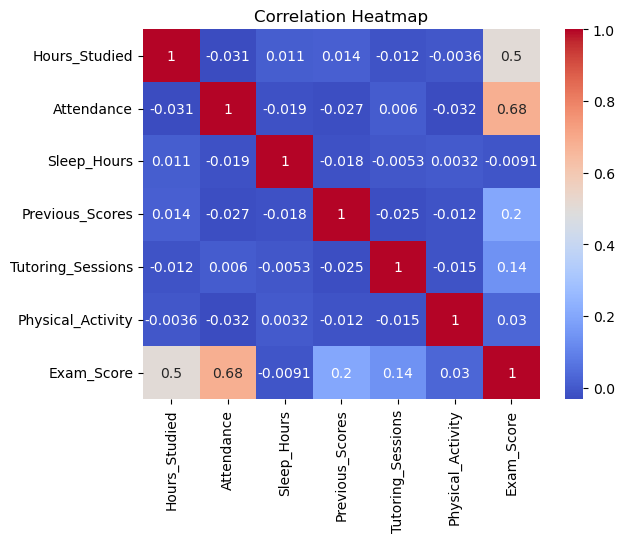

In [72]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Train & Fit the model

In [73]:
x= data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

In [74]:
x=pd.get_dummies(x, drop_first=True)
x

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,True,False,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,True,False,False,True,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,False,True,False,True,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,True,False,False,True,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,False,True,False,True,...,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,False,False,False,True,...,True,True,False,True,False,True,False,False,True,False
6603,23,76,8,81,3,2,False,False,False,True,...,False,True,False,True,False,True,False,False,True,False
6604,20,90,6,65,3,2,False,True,True,False,...,True,True,False,False,False,False,True,False,True,False
6605,10,86,6,91,2,3,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False


In [75]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = model.predict(X_test)
y_pred

array([68.28226647, 70.00121676, 65.40253337, ..., 65.23277221,
       71.73258604, 67.8350589 ])

In [77]:
model.score(X_test, y_test)

0.9893384969466352

In [78]:
model.score(X_train, y_train)

0.9898721719823835

In [79]:
mean_absolute_error(y_test, y_pred)


0.2747226803748446

In [80]:
mean_squared_error(y_test, y_pred)

0.10693186856465509

In [81]:
r2_score(y_test, y_pred)

0.9893384969466352

PolynomialRegression vs LinerRegression

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(x)
poly_model=LinearRegression()
poly_model.fit(X_poly, y)
y_pr=poly_model.predict(X_poly)




In [84]:
poly_r2_score = r2_score(y, y_pr)
poly_r2_score

0.9903584874226791

In [85]:
poly_model.score(X_poly, y)

0.9903584874226791

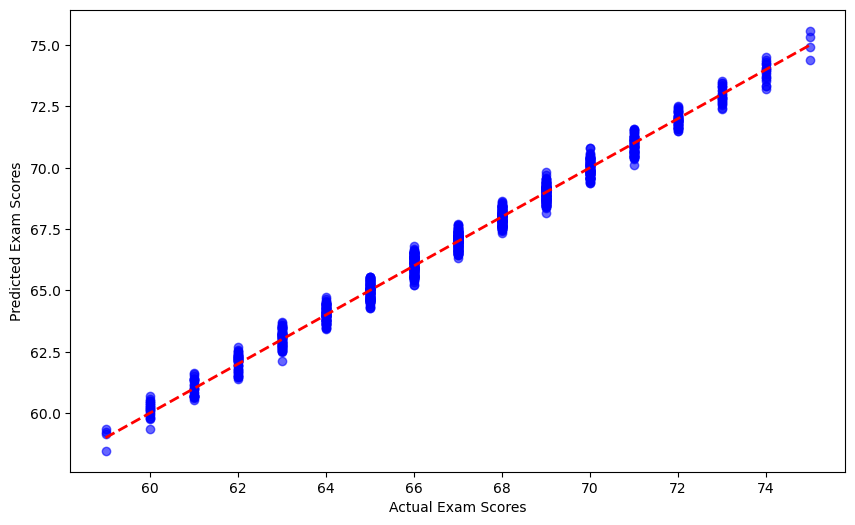

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.show()
